In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())
path1 = os.path.join(r'C:\Users\Vadik\OneDrive\Документы\Учеба\Обработка изображений\Lab1', 'img1.png')
path2 = os.path.join(r'C:\Users\Vadik\OneDrive\Документы\Учеба\Обработка изображений\Lab1', 'img2.png')

C:\Users\Vadik\Anaconda3\Scripts


In [3]:
img1 = np.array(Image.open(path1).convert('RGB'))
img2 = np.array(Image.open(path2).convert('RGB'))

In [4]:
def reference_color_correction(img, src_color, dst_color):
    return (img * dst_color / src_color).clip(0, 255).astype('uint8')

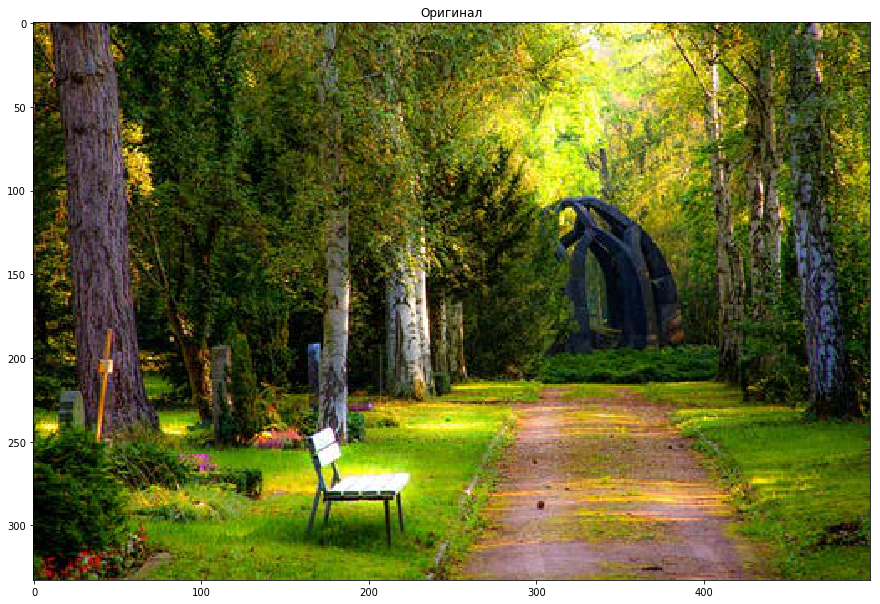

In [5]:
plt.figure(figsize=(15, 15))
plt.title('Оригинал')
plt.imshow(img1)
plt.show()

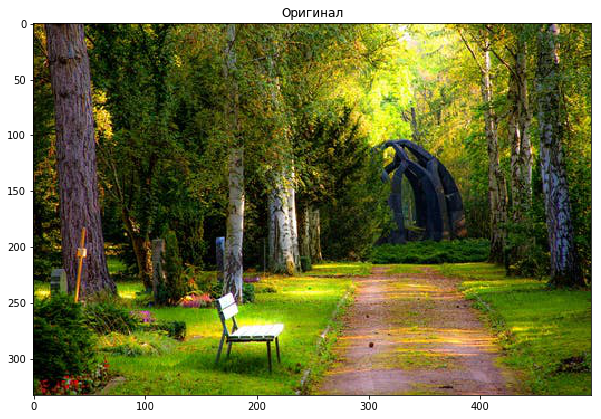

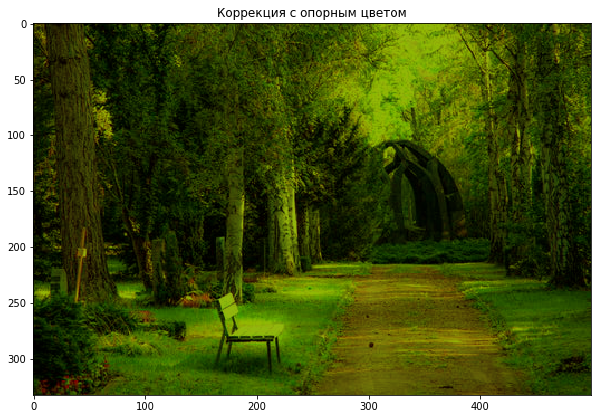

In [6]:
src_color = np.array(img1[100, 300]).astype('float32')
dst_color = np.array(img2[100, 200]).astype('float32')

image = reference_color_correction(img1, dst_color, src_color)

plt.figure(figsize=(10, 10))
plt.title('Оригинал')
plt.imshow(img1)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('Коррекция с опорным цветом')
plt.imshow(image)
plt.show()

In [7]:
def gray_world_correct(img): # gray world
    colors_avg = np.array([img[:, :, i].mean() for i in range(3)])
    avg = colors_avg.mean()
    return (img * avg / colors_avg).clip(0, 255).astype('uint8')

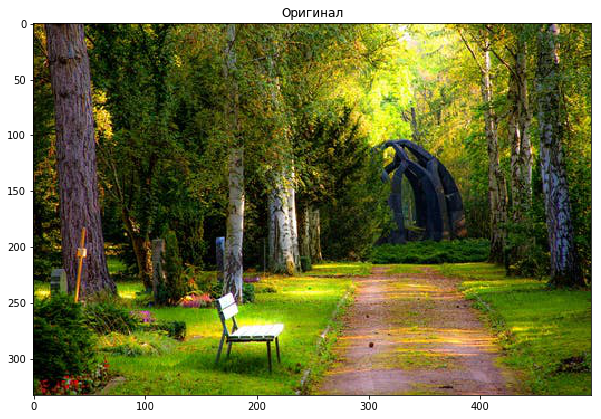

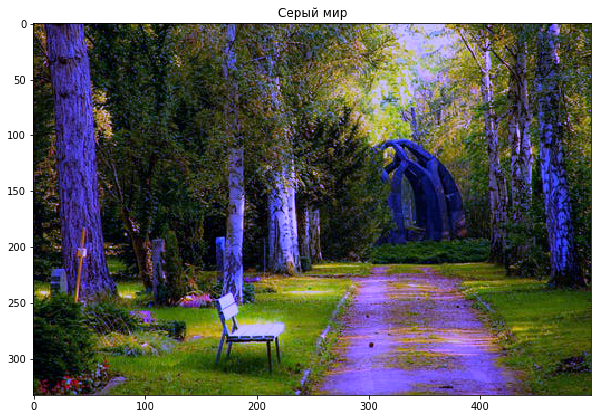

In [8]:
image = gray_world_correct(img1)

plt.figure(figsize=(10, 10))
plt.title('Оригинал')
plt.imshow(img1)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('Серый мир')
plt.imshow(image)
plt.show()

In [9]:
def function_correct(img):
    red = img[:, :, 0].copy()
    green = img[:, :, 1].copy()
    blue = img[:, :, 2].copy()
    
    red = red / 255
    green = green / 255
    blue = blue / 255
    
    red = np.sqrt(red)
    green = np.sqrt(green)
    blue = np.sqrt(blue)
    
    red = red * 255.0
    green = green * 255.0
    blue = blue * 255.0
    
    new_img = img.copy()
    new_img[:,:,0] = red
    new_img[:,:,1] = green
    new_img[:,:,2] = blue
    
    return new_img

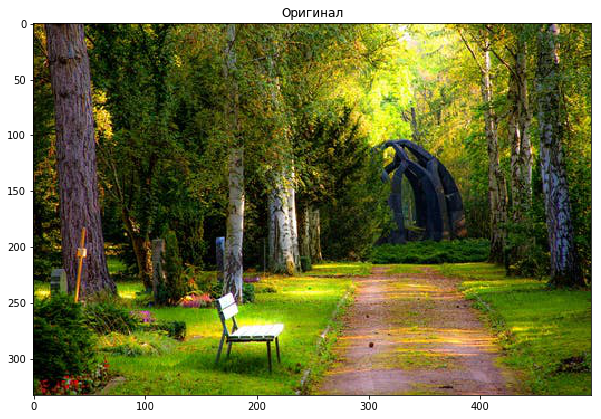

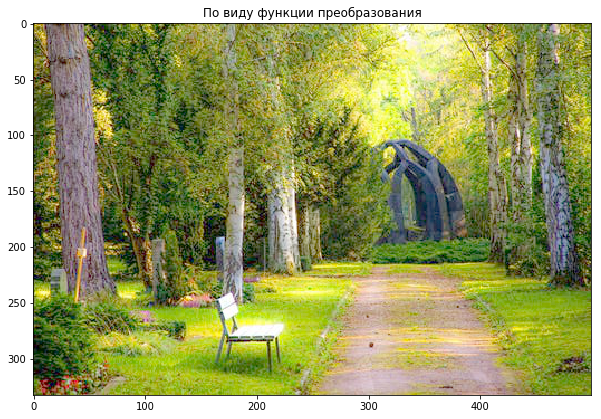

In [10]:
image = function_correct(img1)

plt.figure(figsize=(10, 10))
plt.title('Оригинал')
plt.imshow(img1)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('По виду функции преобразования')
plt.imshow(image)
plt.show()

In [11]:
def rgb2gray(img):
    return (img[:, :, 0]*0.3 + img[:, :, 1]*0.59 + img[:, :, 0]*0.11).astype('uint8')

def calc_histogram(img):
    res = [0]*256
    for p in img.flatten():
        res[p] += 1
    return np.array(res), list(range(256))

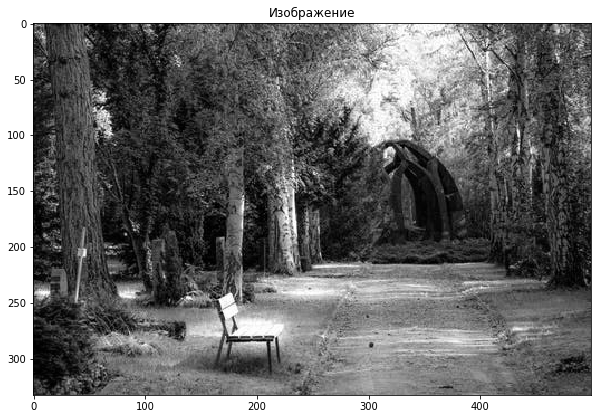

In [12]:
img2 = img1.copy()
img2 = rgb2gray(img2).copy()

plt.figure(figsize=(10, 10))
plt.title('Изображение')
plt.gray()
plt.imshow(img2)
plt.show()

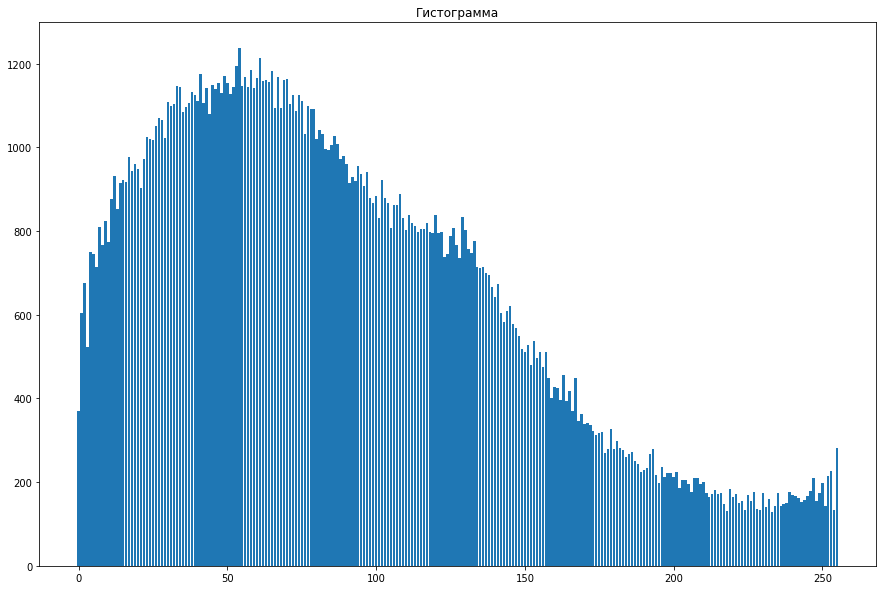

In [13]:
img_h, x = calc_histogram(img2)

plt.figure(figsize=(15, 10))
plt.bar(x, img_h)
plt.title('Гистограмма')
plt.show()

In [14]:
def hist_normalization(hist, start_index, end_index):
    n = len(hist) - 1
    dx = (end_index - start_index) / n
    new_hist = np.array([hist[start_index + int(i*dx)] for i in range(n + 1)])
    
    t = -1
    for i in range(len(new_hist)):
        if t != int(i*dx):
            t = int(i*dx)
        else:
            new_hist[i] = 0
            
    return new_hist

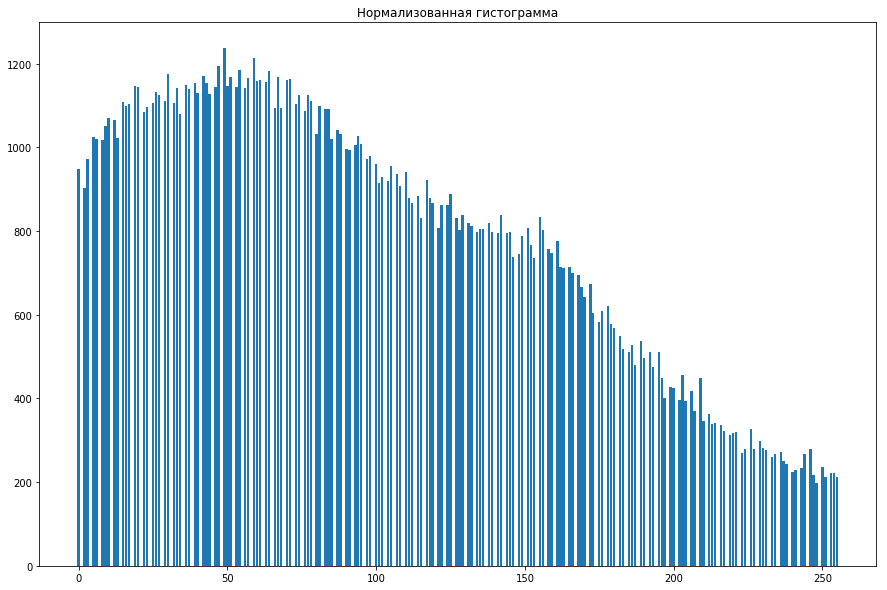

In [15]:
normed_img_h = hist_normalization(img_h, 20, 200)

plt.figure(figsize=(15, 10))
plt.bar(x, normed_img_h)
plt.title('Нормализованная гистограмма')
plt.show()

In [16]:
def histogram_equalisation(img, hist, shape):
    img_hist = hist / img.shape[0] / img.shape[1]
    
    for i in range(1, 256):
        img_hist[i] += img_hist[i - 1]
        
    return img_hist

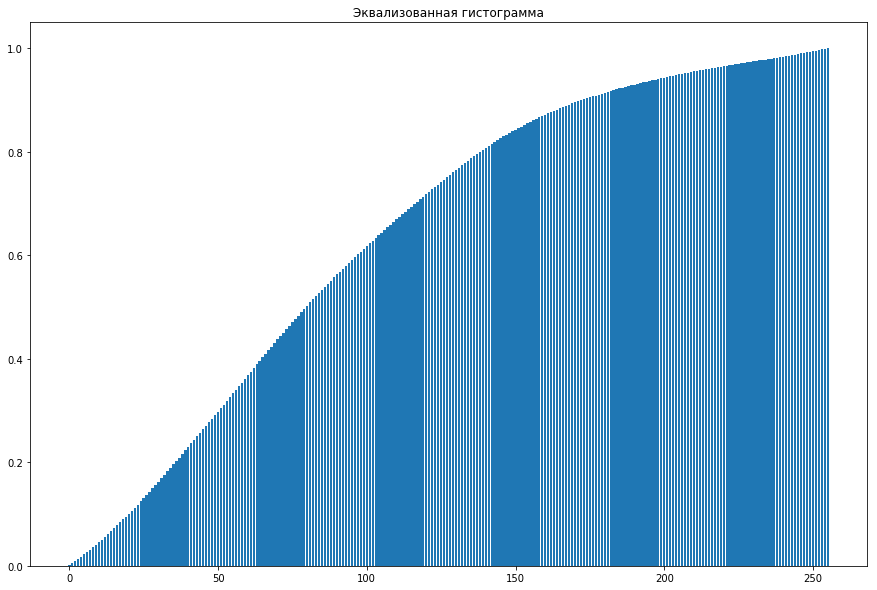

In [17]:
img_equalisation = histogram_equalisation(img2, img_h, img1.shape)

plt.figure(figsize=(15, 10))
plt.bar(x, img_equalisation)
plt.title('Эквализованная гистограмма')
plt.show()

In [18]:
def correct_by_histogram_equalisation(img):
    original_img = img.copy()
    img_hist, _ = calc_histogram(img)
    img_hist = histogram_equalisation(img, img_hist, img.shape)
        
    for i in range(256):
        img[original_img == i] = np.uint8((img_hist[i] * 255.0).clip(0, 255))
        
    return img

In [19]:
def find_nearest(arr, elem):
    nearest = [abs(arr[0] - elem), 0]
    for i in range(1, len(arr)):
        if abs(arr[i] - elem) < nearest[0]:
            nearest = [abs(arr[i] - elem), i]
    return arr[nearest[1]]

def correct_by_histogram(img, hist):
    original_img = img.copy()
    img_hist, _ = calc_histogram(img)
    
    eq_img_hist = histogram_equalisation(img, img_hist, img.shape)
    _hist = histogram_equalisation(img, hist, img.shape)
    
    for i in range(256):
        img[original_img == i] = np.uint8((find_nearest(eq_img_hist, _hist[i]) * 255.0).clip(0, 255))
    
    return img

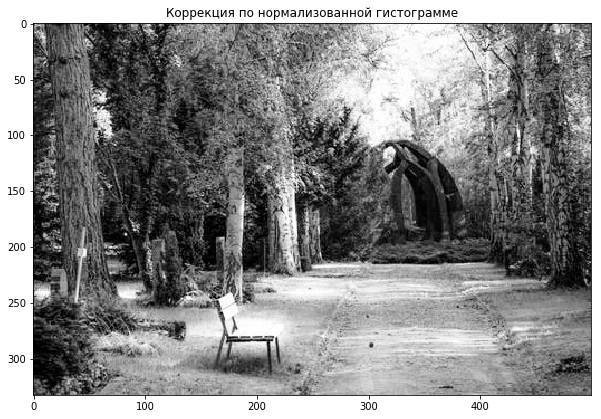

In [20]:
img = correct_by_histogram(img2, normed_img_h)

plt.figure(figsize=(10, 10))
plt.title('Коррекция по нормализованной гистограмме')
plt.gray()
plt.imshow(img)
plt.show()

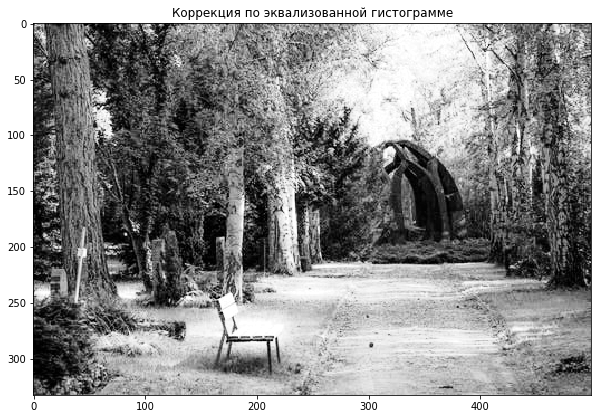

In [21]:
img = correct_by_histogram_equalisation(img2)

plt.figure(figsize=(10, 10))
plt.title('Коррекция по эквализованной гистограмме')
plt.gray()
plt.imshow(img)
plt.show()